In [24]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline
sns.set_style('whitegrid')
PATH='~/Downloads/Upgrad/ML-1/Linear Regression Module/Linear Regression Assignment/Data Files/'
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Step 1. Reading and Understanding the Data

In [25]:
#Loading our dataset
carprice=pd.read_csv(PATH+'CarPrice_Assignment.csv')


In [26]:
carprice.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
carprice.shape

(205, 26)

In [28]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [29]:
carDictionary=pd.read_excel(PATH+'Data Dictionary - carprices.xlsx')

In [30]:
pd.set_option('display.max_colwidth', -1)
carDictionary

,Variable,Desc
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


In [31]:
#Checking if there is any missing data in the dataset
carprice.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [33]:
# get some basic ideas about the data
def summarize_data(df):
    for column in df.columns:
        print (column)
        if df.dtypes[column] == np.object: # Categorical data
            print (df[column].value_counts())
        else:
            print (df[column].describe() )
            
        print ('\n')
    
summarize_data(carprice)

car_ID
count    205.000000
mean     103.000000
std      59.322565 
min      1.000000  
25%      52.000000 
50%      103.000000
75%      154.000000
max      205.000000
Name: car_ID, dtype: float64


symboling
count    205.000000
mean     0.834146  
std      1.245307  
min     -2.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  
Name: symboling, dtype: float64


CarName
peugeot 504              6
toyota corolla           6
toyota corona            6
subaru dl                4
mitsubishi mirage g4     3
                        ..
nissan juke              1
dodge dart custom        1
buick century special    1
maxda glc deluxe         1
dodge rampage            1
Name: CarName, Length: 147, dtype: int64


fueltype
gas       185
diesel    20 
Name: fueltype, dtype: int64


aspiration
std      168
turbo    37 
Name: aspiration, dtype: int64


doornumber
four    115
two     90 
Name: doornumber, dtype: int64


carbody
sedan          96
hatchback      70


# Step 2: Cleaning and Visualizing the data

In [34]:
#Creating a new variable company from CarName and doing some spelling corrections

carprice['Company']=carprice['CarName'].apply(lambda x: x.lower().split(' ')[0])
carprice['Company']=carprice['Company'].replace({'maxda':'mazda', 'toyouta': 'toyota', 'vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})


In [35]:
#Dropping CarID and CarName fields

carprice.drop('car_ID',axis=1,inplace=True)
carprice.drop('CarName',axis=1,inplace=True)


## UNIVARIATE ANANALYSIS

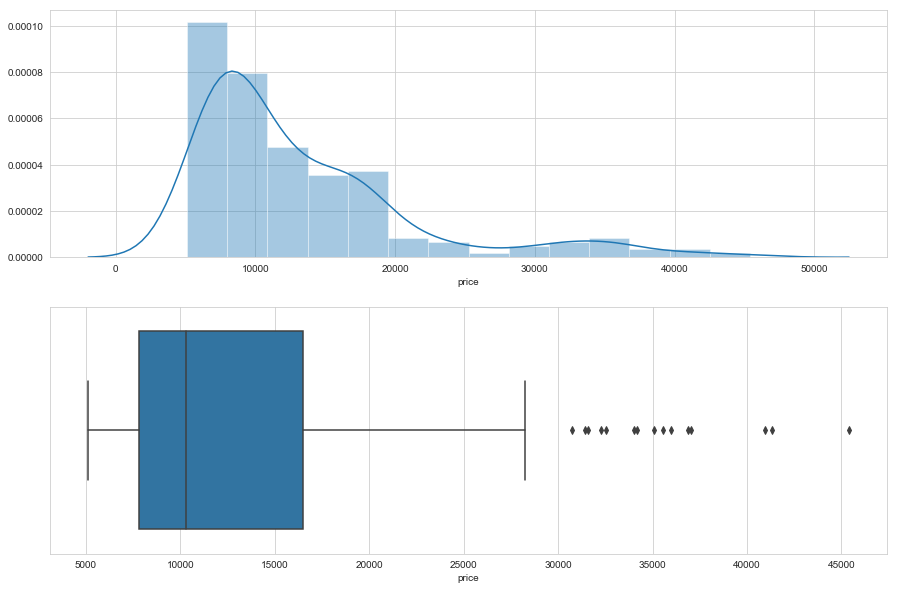

In [36]:
#Plotting our target variable 'price'
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(carprice['price'])
plt.subplot(2,1,2)
sns.boxplot(carprice['price'])

Price of the car ranges around 5k-45k with Median around 10k

### Visualize the categorical variables: 
1. Symboling 
2. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. Company

In [46]:
carprice.enginetype.value_counts()

ohc      148
ohcf     15 
ohcv     13 
dohc     12 
l        12 
rotor    4  
dohcv    1  
Name: enginetype, dtype: int64

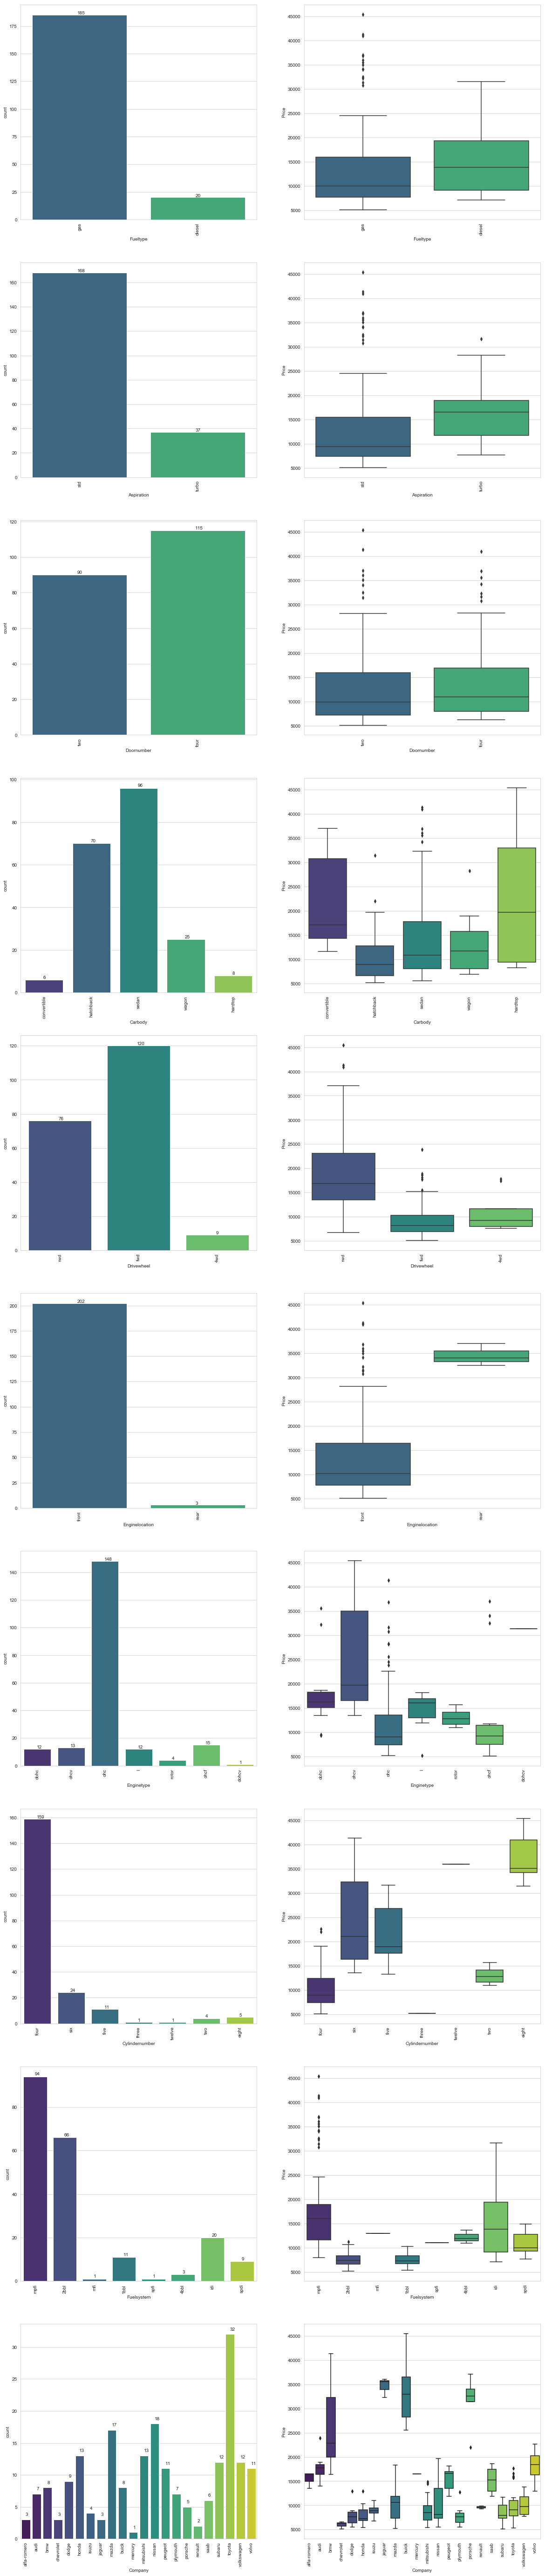

In [37]:
#Plotting categorical variables using Countplot and Boxplot
plt.figure(figsize=(20,100))
i=1
for col in carprice:
    if(carprice[col].dtypes==object):
        plt.subplot(10,2,i)
        ax=sns.countplot(carprice[col],palette='viridis')
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:}'.format(height), (x+width/2-0.02, y + height+0.6))
        plt.xticks(rotation=90)
        plt.xlabel(col.capitalize())
        
        plt.subplot(10,2,i+1)
        sns.boxplot(carprice[col],carprice['price'],palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel(col.capitalize())
        plt.ylabel('Price')
        i+=2
        
'fueltype_diesel','aspiration_turbo','doornumber_two','carbody_convertible','drivewheel_4wd','enginelocation_rear'
,'enginetype_dohcv','fuelsystem_mfi','company_mercury'

# Step 3: Data Preparation

In [38]:
#Converting Cylindernumber and door number to integer

carprice['cylindernumber']=carprice['cylindernumber'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})
carprice['doornumber']=carprice['doornumber'].replace({'two':2,'four':4})

### Checking the Correlation
We will not label encode the categorical variables and check the correlation between the variables

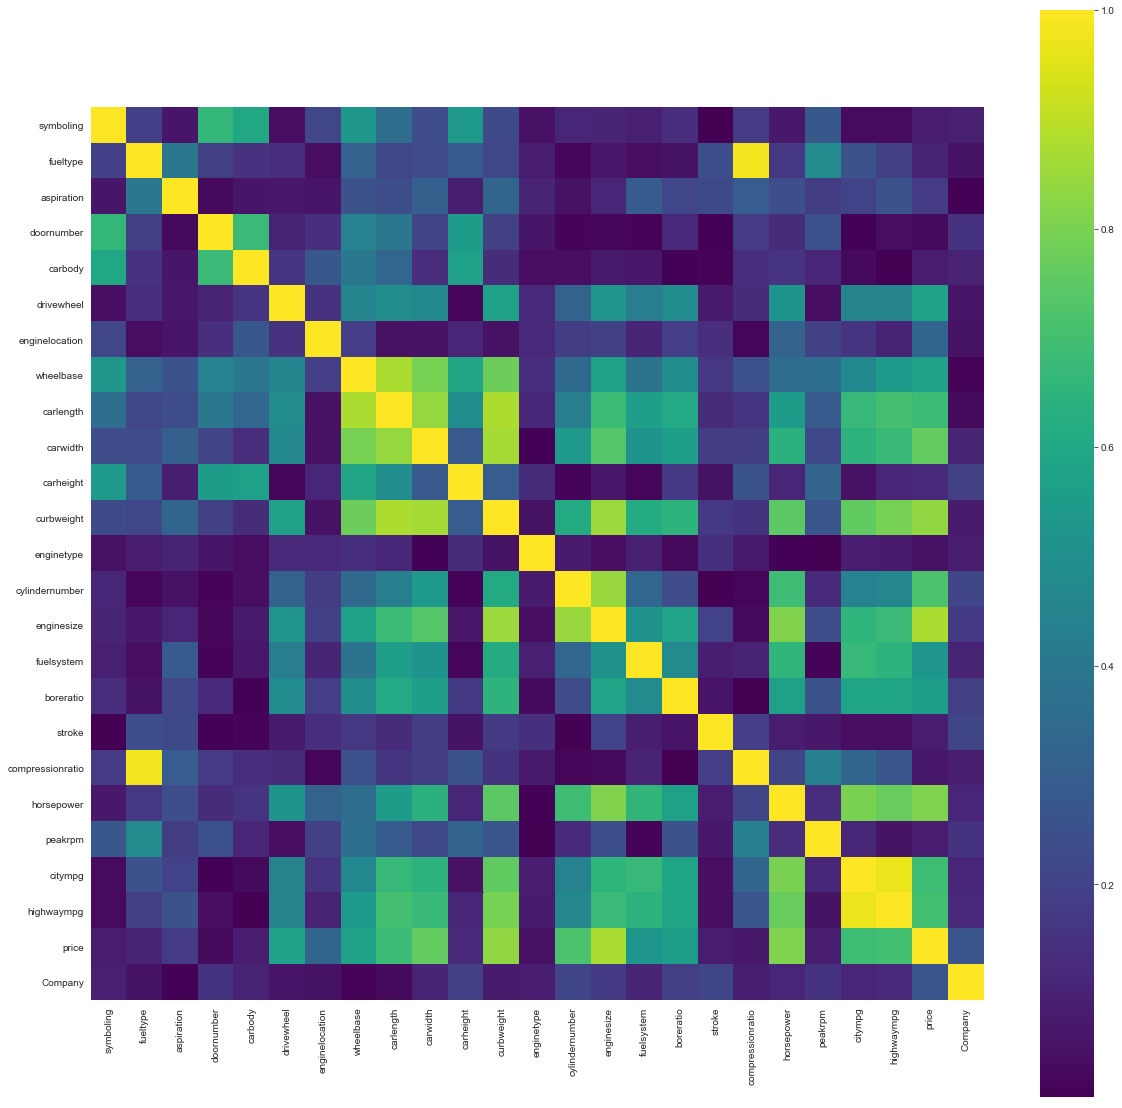

In [39]:
# Encode the categorical features as numbers to check correlation
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result


# Calculate the correlation and plot it
encoded_data= number_encode_features(carprice)
plt.figure(figsize=(20,20))
sns.heatmap(abs(encoded_data.corr()), square=True,cmap='viridis')


We can see that there is a high correlation between fueltype and compression ratio, and , highwaympg and citympg. Lets check on this further.

    fueltype  compressionratio
0    gas      9.0             
1    gas      9.0             
2    gas      9.0             
3    gas      10.0            
4    gas      8.0             
..   ...      ...             
200  gas      9.5             
201  gas      8.7             
202  gas      8.8             
203  diesel   23.0            
204  gas      9.5             

[205 rows x 2 columns]


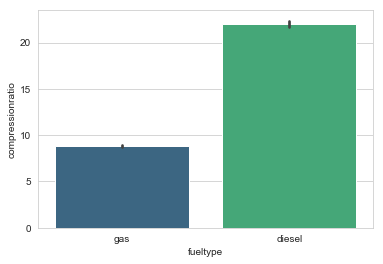

In [40]:
#Lets first analyse fueltype and compression ratio

print(carprice[["fueltype", "compressionratio"]])
sns.barplot("fueltype", "compressionratio",data=carprice,palette='viridis')

We can see the difference in the compression ratio between gas and diesel and clearly see why the columns have high correlation, we will drop compression ratio in our further analysis.

In [41]:
#Dropping compressionratio
carprice.drop('compressionratio',axis=1,inplace=True)

     citympg  highwaympg
0    21       27        
1    21       27        
2    19       26        
3    24       30        
4    18       22        
..   ..       ..        
200  23       28        
201  19       25        
202  18       23        
203  26       27        
204  19       25        

[205 rows x 2 columns]


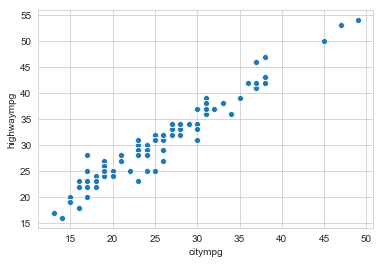

In [42]:
# Lets take a look at citympg and highwaympg variables
print(carprice[["citympg", "highwaympg"]])
sns.scatterplot("citympg", "highwaympg",data=carprice)

In [43]:
#Dropping citympg as it is highly corelated with highwaympg
carprice.drop('citympg',axis=1,inplace=True)

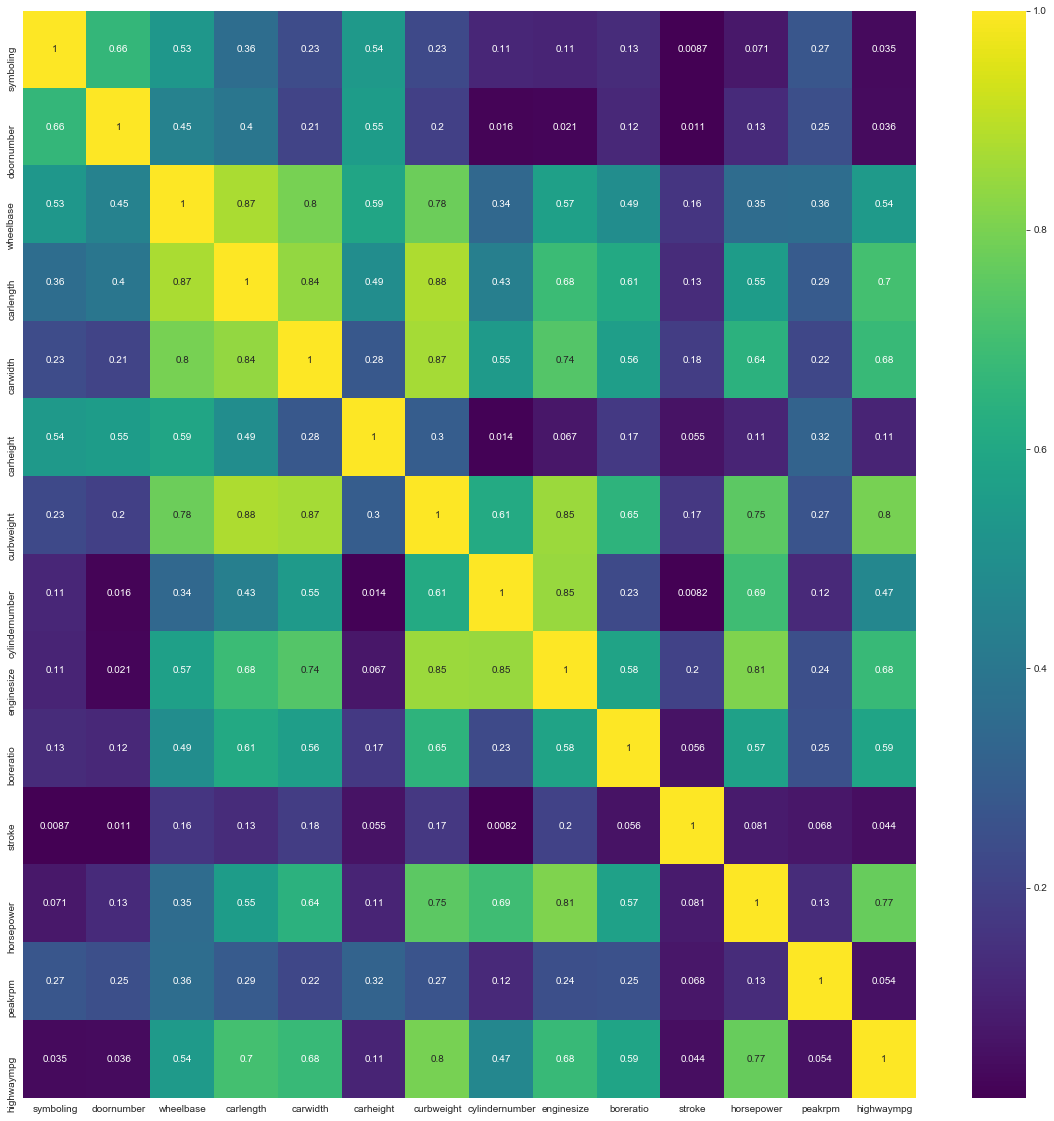

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(carprice.drop('price', axis=1).corr()),annot=True,cmap='viridis')
#Min Max Scaling of numerical columns in X_train


### Creating the dummy variables for categories

In [47]:
#Creating dummy variables for categories 

varlist=['fueltype','aspiration','carbody','drivewheel','fuelsystem','enginetype','Company','doornumber'
         ,'enginelocation']

#Label Encoder- Symboling, doornumber, cylindernumber
carprice=pd.get_dummies(carprice,columns=varlist,prefix_sep='_')
carprice.drop(columns=['fueltype_diesel','aspiration_turbo','doornumber_2','carbody_convertible','drivewheel_4wd','enginelocation_rear'
,'enginetype_dohcv','fuelsystem_mfi','Company_mercury'], axis=1, inplace=True)

In [48]:
carprice.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo,doornumber_4,enginelocation_front
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,1
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,1
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,1,1
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,1,1


# Step 4: Splitting the data into train and test

In [49]:
#Splitting the data into X_train and X_test

from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(carprice, test_size=0.3, random_state=100)

In [50]:
#Checking the shape of X_train and X_test 

print(X_train.shape)
print(X_test.shape)

(143, 58)
(62, 58)


### Min Max scaling for our continuous variables

In [51]:
#Min Max Scaling of numerical columns in X_train

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

mm_scaler_list=['wheelbase','carwidth','carheight','boreratio','stroke','horsepower','peakrpm',
         'highwaympg','symboling','cylindernumber','price']

X_train[mm_scaler_list]=scaler.fit_transform(X_train[mm_scaler_list])


### Separating the data into independent and predictor variables

In [52]:
#Dividing X_test into X_test(independent variables) and y(dependent variable price)

y_train=X_train.pop('price')
X_train=X_train

In [53]:
#importing  LinearRegression from SKLearn and creating an object and fitting the model with all variables

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Using RFE to select the top 15 significant features

In [54]:
#Feature selection using RFE selecting the top 15 variables

from sklearn.feature_selection import RFE
rfe=RFE(lm,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [55]:
rfe.support_

array([False,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True])

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 29),
 ('wheelbase', True, 1),
 ('carlength', False, 40),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', False, 42),
 ('cylindernumber', True, 1),
 ('enginesize', False, 32),
 ('boreratio', False, 15),
 ('stroke', False, 8),
 ('horsepower', True, 1),
 ('peakrpm', False, 16),
 ('highwaympg', False, 6),
 ('fueltype_gas', False, 37),
 ('aspiration_std', False, 17),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 10),
 ('drivewheel_rwd', False, 22),
 ('fuelsystem_1bbl', False, 41),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', False, 14),
 ('fuelsystem_idi', False, 34),
 ('fuelsystem_mpfi', False, 38),
 ('fuelsystem_spdi', False, 39),
 ('fuelsystem_spfi', False, 43),
 ('enginetype_dohc', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', False, 3),
 ('enginetype_rotor', Tru

In [57]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,carwidth,cylindernumber,horsepower,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_rotor,Company_bmw,Company_peugeot,enginelocation_front
122,0.244828,0.291667,0.2,0.083333,0,0,1,0,0,0,1,0,0,0,1
125,0.272414,0.666667,0.2,0.395833,0,1,0,0,0,0,1,0,0,0,1
166,0.272414,0.308333,0.2,0.266667,0,1,0,0,1,0,0,0,0,0,1
1,0.068966,0.316667,0.2,0.262500,0,0,0,0,1,0,0,0,0,0,1
199,0.610345,0.575000,0.2,0.475000,0,0,0,1,0,0,1,0,0,0,1


# Step 5 : Building our model

In [58]:
#Creating our first model with 15 variables from RFE

X_train_rfe=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfe).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     84.65
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.66e-58
Time:                        22:15:47   Log-Likelihood:                 188.38
No. Observations:                 143   AIC:                            -344.8
Df Residuals:                     127   BIC:                            -297.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4565      0.100      4.551      0.000       0.258       0.655
wheelbase                0.2700      0.071      3.806      0.000       0.130       0.410
carwidth                 0.4175      0.087      4.818      0.000       0.246       0.589
cylindernumber           0.3320      0.094      3.535      0.001       0.146       0.518
horsepower               0.3518      0.079      4.428      0.000       0.195       0.509
carbody_hardtop         -0.2142      0.065     -3.311      0.001      -0.342      -0.086
carbody_hatchback       -0.2269      0.041     -5.574      0.000      -0.307      -0.146
carbody_sedan           -0.2122      0.042     -5.069      0.000      -0.295      -0.129
carbody_wagon           -0.2213      0.045     -4.895      0.000      -0.311      -0.132
enginetype_dohc          0.0203      0.031      0.654      0.515      -0.041       0.082
enginetype_l             0.2483      0.074      3.351      0.001       0.102       0.395
enginetype_ohc           0.0327      0.020      1.641      0.103      -0.007       0.072
enginetype_rotor         0.1566      0.048      3.248      0.001       0.061       0.252
Company_bmw              0.2187      0.034      6.494      0.000       0.152       0.285
Company_peugeot         -0.3207      0.079     -4.083      0.000      -0.476      -0.165
enginelocation_front    -0.5270      0.089     -5.900      0.000      -0.704      -0.350
==============================================================================
Omnibus:                       22.217   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.540
Skew:                           0.686   Prob(JB):                     3.51e-10
Kurtosis:                       5.329   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have got a low P(F-stats), so we have got a good model. Also, the adjust R-squared is 0.91 which is good as well. The P-value is less than 0.05 for all our variables which is ideal. Lets find the VIF now to avoid any multicollinearity issue.

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,294.25
7,carbody_sedan,11.14
12,Company_peugeot,9.84
6,carbody_hatchback,9.51
9,enginetype_l,9.04
2,carwidth,6.20
8,carbody_wagon,5.98
1,wheelbase,5.20
4,horsepower,3.97
3,cylindernumber,3.21


We can see that carbody_sedan has a high VIF, lets remove the variable and check our model.

In [59]:
#Creating our second model after dropping carbody_sedan as it has high VIF value
X_train_rfe.drop('enginetype_dohc', axis=1,inplace=True)
lr2=sm.OLS(y_train,X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     91.07
Date:                Thu, 21 May 2020   Prob (F-statistic):           2.10e-59
Time:                        22:16:01   Log-Likelihood:                 188.14
No. Observations:                 143   AIC:                            -346.3
Df Residuals:                     128   BIC:                            -301.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4673      0.099      4.735      0.000       0.272       0.663
wheelbase                0.2897      0.064      4.523      0.000       0.163       0.416
carwidth                 0.3953      0.080      4.970      0.000       0.238       0.553
cylindernumber           0.3181      0.091      3.486      0.001       0.138       0.499
horsepower               0.3705      0.074      5.008      0.000       0.224       0.517
carbody_hardtop         -0.2251      0.062     -3.609      0.000      -0.349      -0.102
carbody_hatchback       -0.2359      0.038     -6.176      0.000      -0.312      -0.160
carbody_sedan           -0.2219      0.039     -5.682      0.000      -0.299      -0.145
carbody_wagon           -0.2327      0.042     -5.587      0.000      -0.315      -0.150
enginetype_l             0.2409      0.073      3.297      0.001       0.096       0.386
enginetype_ohc           0.0276      0.018      1.509      0.134      -0.009       0.064
enginetype_rotor         0.1484      0.046      3.195      0.002       0.056       0.240
Company_bmw              0.2154      0.033      6.484      0.000       0.150       0.281
Company_peugeot         -0.3221      0.078     -4.111      0.000      -0.477      -0.167
enginelocation_front    -0.5212      0.089     -5.877      0.000      -0.697      -0.346
==============================================================================
Omnibus:                       24.119   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.110
Skew:                           0.748   Prob(JB):                     5.89e-11
Kurtosis:                       5.381   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After removing the carbody_sedan, the model P(F-stat) is still very low. The adjusted R-square is 0.89 which is still a good number for the model. But certain variables including carbody_hardtop, carbody_wagon, highwaympg, enginelocation_rear have become significant. Lets remove the variable 'carbody_hardtop' and build our model again.

In [60]:
#Creating our third model after dropping carbody_hardtop as it has high P value

X_train_rfe.drop('enginetype_ohc', axis=1,inplace=True)
lr3=sm.OLS(y_train,X_train_rfe).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     96.94
Date:                Thu, 21 May 2020   Prob (F-statistic):           6.39e-60
Time:                        22:16:09   Log-Likelihood:                 186.88
No. Observations:                 143   AIC:                            -345.8
Df Residuals:                     129   BIC:                            -304.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4785      0.099      4.837      0.000       0.283       0.674
wheelbase                0.2821      0.064      4.397      0.000       0.155       0.409
carwidth                 0.4210      0.078      5.394      0.000       0.267       0.575
cylindernumber           0.2887      0.090      3.222      0.002       0.111       0.466
horsepower               0.3314      0.070      4.759      0.000       0.194       0.469
carbody_hardtop         -0.2079      0.062     -3.373      0.001      -0.330      -0.086
carbody_hatchback       -0.2234      0.037     -5.962      0.000      -0.297      -0.149
carbody_sedan           -0.2107      0.039     -5.468      0.000      -0.287      -0.134
carbody_wagon           -0.2250      0.042     -5.417      0.000      -0.307      -0.143
enginetype_l             0.2151      0.071      3.012      0.003       0.074       0.356
enginetype_rotor         0.1198      0.043      2.812      0.006       0.036       0.204
Company_bmw              0.2311      0.032      7.293      0.000       0.168       0.294
Company_peugeot         -0.3195      0.079     -4.058      0.000      -0.475      -0.164
enginelocation_front    -0.5156      0.089     -5.791      0.000      -0.692      -0.339
==============================================================================
Omnibus:                       23.252   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.494
Skew:                           0.720   Prob(JB):                     1.32e-10
Kurtosis:                       5.358   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-square has not dropped much but we still have some variables with high P value,which means that some variables are still pretty significant. We will drop carbody_wagon and build our model the fourth time.

In [62]:
#Creating our fourth model after dropping carbody_wagon as it has high VIF

X_train_rfe.drop('carbody_sedan', axis=1,inplace=True)
lr4=sm.OLS(y_train,X_train_rfe).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     83.88
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.12e-55
Time:                        22:16:30   Log-Likelihood:                 171.98
No. Observations:                 143   AIC:                            -318.0
Df Residuals:                     130   BIC:                            -279.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2497      0.099      2.520      0.013       0.054       0.446
wheelbase                0.1588      0.066      2.392      0.018       0.027       0.290
carwidth                 0.4949      0.085      5.822      0.000       0.327       0.663
cylindernumber           0.3161      0.099      3.197      0.002       0.120       0.512
horsepower               0.3360      0.077      4.366      0.000       0.184       0.488
carbody_hardtop         -0.0098      0.055     -0.178      0.859      -0.119       0.099
carbody_hatchback       -0.0343      0.016     -2.151      0.033      -0.066      -0.003
carbody_wagon           -0.0213      0.020     -1.050      0.296      -0.062       0.019
enginetype_l             0.2192      0.079      2.778      0.006       0.063       0.375
enginetype_rotor         0.1216      0.047      2.582      0.011       0.028       0.215
Company_bmw              0.2293      0.035      6.544      0.000       0.160       0.299
Company_peugeot         -0.2990      0.087     -3.439      0.001      -0.471      -0.127
enginelocation_front    -0.4752      0.098     -4.844      0.000      -0.669      -0.281
==============================================================================
Omnibus:                       28.689   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.124
Skew:                           0.953   Prob(JB):                     2.15e-11
Kurtosis:                       5.148   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-square has not dropped after dropping 'carbody_wagon' but we still have some variables with high P value. We will drop highwaympg and build our model the fourth time.

In [63]:
#Creating our fifth model after dropping highwaympg as it has high P-value

X_train_rfe.drop('carbody_hardtop', axis=1,inplace=True)
lr5=sm.OLS(y_train,X_train_rfe).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     92.19
Date:                Thu, 21 May 2020   Prob (F-statistic):           4.25e-56
Time:                        22:16:41   Log-Likelihood:                 171.96
No. Observations:                 143   AIC:                            -319.9
Df Residuals:                     131   BIC:                            -284.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2398      0.082      2.937      0.004       0.078       0.401
wheelbase                0.1585      0.066      2.396      0.018       0.028       0.289
carwidth                 0.4961      0.084      5.875      0.000       0.329       0.663
cylindernumber           0.3171      0.098      3.223      0.002       0.122       0.512
horsepower               0.3350      0.076      4.381      0.000       0.184       0.486
carbody_hatchback       -0.0339      0.016     -2.154      0.033      -0.065      -0.003
carbody_wagon           -0.0210      0.020     -1.042      0.299      -0.061       0.019
enginetype_l             0.2195      0.079      2.792      0.006       0.064       0.375
enginetype_rotor         0.1219      0.047      2.597      0.010       0.029       0.215
Company_bmw              0.2296      0.035      6.589      0.000       0.161       0.299
Company_peugeot         -0.2991      0.087     -3.454      0.001      -0.470      -0.128
enginelocation_front    -0.4660      0.083     -5.608      0.000      -0.630      -0.302
==============================================================================
Omnibus:                       28.814   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.384
Skew:                           0.956   Prob(JB):                     1.89e-11
Kurtosis:                       5.152   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our R-square is still pretty much the same after dropping 'highway_mpg'. The p-value for all variables is less than 0.05, which means all the variables are significant now. Lets check the VIF to check for multicollinearity.

In [39]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.83
2,carwidth,6.95
4,horsepower,4.60
1,wheelbase,4.21
3,cylindernumber,3.42
10,Company_porsche,3.36
11,enginelocation_rear,2.24
6,enginetype_dohcv,2.14
7,enginetype_rotor,1.55
9,Company_buick,1.43


We can see that the VIF of carwidth is 6.95 which is pretty significant, we will drop this variable and build out model again.

In [64]:
#Creating our sixth model after dropping carwidth as it has high VIF

X_train_rfe.drop('carbody_wagon', axis=1,inplace=True)
lr6=sm.OLS(y_train,X_train_rfe).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 21 May 2020   Prob (F-statistic):           7.02e-57
Time:                        22:16:50   Log-Likelihood:                 171.37
No. Observations:                 143   AIC:                            -320.7
Df Residuals:                     132   BIC:                            -288.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2378      0.082      2.913      0.004       0.076       0.399
wheelbase                0.1484      0.065      2.268      0.025       0.019       0.278
carwidth                 0.5093      0.084      6.099      0.000       0.344       0.674
cylindernumber           0.3213      0.098      3.268      0.001       0.127       0.516
horsepower               0.3291      0.076      4.315      0.000       0.178       0.480
carbody_hatchback       -0.0299      0.015     -1.958      0.052      -0.060       0.000
enginetype_l             0.2217      0.079      2.820      0.006       0.066       0.377
enginetype_rotor         0.1224      0.047      2.608      0.010       0.030       0.215
Company_bmw              0.2351      0.034      6.820      0.000       0.167       0.303
Company_peugeot         -0.3034      0.087     -3.506      0.001      -0.475      -0.132
enginelocation_front    -0.4701      0.083     -5.660      0.000      -0.634      -0.306
==============================================================================
Omnibus:                       29.278   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.378
Skew:                           0.969   Prob(JB):                     1.15e-11
Kurtosis:                       5.167   Cond. No.                         31.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping the carwidth has decrease the significance of some variable as they have high P-value. We will drop enginelocation_rear and build our model again.

In [70]:
#Creating our seventh model after dropping horsepower as it has high P value

X_train_rfe.drop('carwidth', axis=1,inplace=True)
lr7=sm.OLS(y_train,X_train_rfe).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     119.5
Date:                Thu, 21 May 2020   Prob (F-statistic):           1.00e-51
Time:                        22:17:30   Log-Likelihood:                 148.25
No. Observations:                 143   AIC:                            -282.5
Df Residuals:                     136   BIC:                            -261.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2200      0.094      2.338      0.021       0.034       0.406
wheelbase                0.3962      0.041      9.778      0.000       0.316       0.476
cylindernumber           0.4506      0.110      4.094      0.000       0.233       0.668
horsepower               0.5416      0.075      7.217      0.000       0.393       0.690
enginetype_rotor         0.1509      0.053      2.833      0.005       0.046       0.256
Company_bmw              0.1931      0.038      5.089      0.000       0.118       0.268
enginelocation_front    -0.4103      0.094     -4.385      0.000      -0.595      -0.225
==============================================================================
Omnibus:                       40.253   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.841
Skew:                           1.157   Prob(JB):                     2.54e-21
Kurtosis:                       6.250   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have got a pretty good F stats and adjusted R-square. All the variables are also significant now. Lets check the VIF for multicollinearity.

In [69]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,163.65
2,carwidth,5.68
4,horsepower,3.82
1,wheelbase,3.50
3,cylindernumber,3.02
5,enginetype_rotor,1.45
6,Company_bmw,1.16
7,enginelocation_front,1.14


The VIF is now less than 5 for all our variables which means we have a good model now. We will predict the values for the y_train and do the residual analysis now.

## Residual Analysis

In [43]:
#Finding the predicted y_train for our model

y_train_predict=lr7.predict(X_train_rfe)

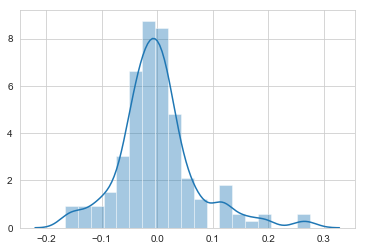

In [44]:
#Residual analysis
sns.distplot(y_train-y_train_predict)

THe graph seems to follow a normal distribution around 0. Our assumption that the error term is normally ditributed around 0 is valid for our model. We will now validate if our error is random or not.

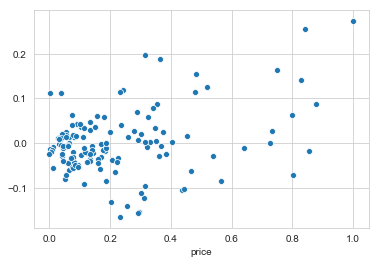

In [45]:
sns.scatterplot(y_train,y_train-y_train_predict)

Our error term are pretty random. So this proved our assumptions for linear regression regarding the error terms. <br>
Next, we will predict the values on our unseen data X_test.

# Step 6: Making predictions to the test set using our model

In [46]:
#Copying X_test to a new variable X_test_rfe
X_test_rfe=X_test.copy()

### Scaling our Test set

In [47]:
#Min Max Scaling of numerical columns in X_test_rfe

X_test_rfe[mm_scaler_list]=scaler.transform(X_test_rfe[mm_scaler_list])

### Splitting our Test set into Independent and Predictor variable

In [48]:
#Transforming X_test for model prediction and creating y_test

varlist=list(X_train_rfe.columns[1:,])
y_test_rfe=X_test_rfe.pop('price')
X_test_rfe=X_test_rfe[varlist]


In [49]:
#Adding constant to our test set and making the predictions.
X_test_rfe=sm.add_constant(X_test_rfe)

y_test_predict=lr7.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

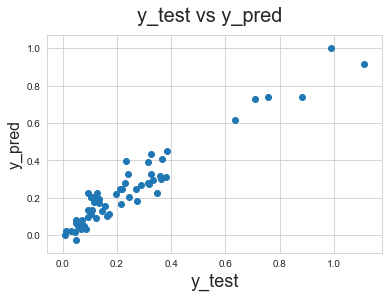

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_rfe,y_test_predict,cmap='viridis')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Checking our model accuracy

In [51]:
# Lets check our r2 score for the test set.
import sklearn.metrics as metrics
metrics.r2_score(y_test_rfe,y_test_predict)

0.9192117391372214

R2 score is 0.91 which is pretty similar to our model's R square which is 0.89. Lets build a scatterplot to see our initial and predicted  predictor variable.

In [52]:
#Printing MAR, MSE and RMSE

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_rfe,y_test_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_rfe,y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_rfe,y_test_predict)))

Mean Absolute Error: 0.050725957348159934
Mean Squared Error: 0.0043179899427575295
Root Mean Squared Error: 0.06571141409799008


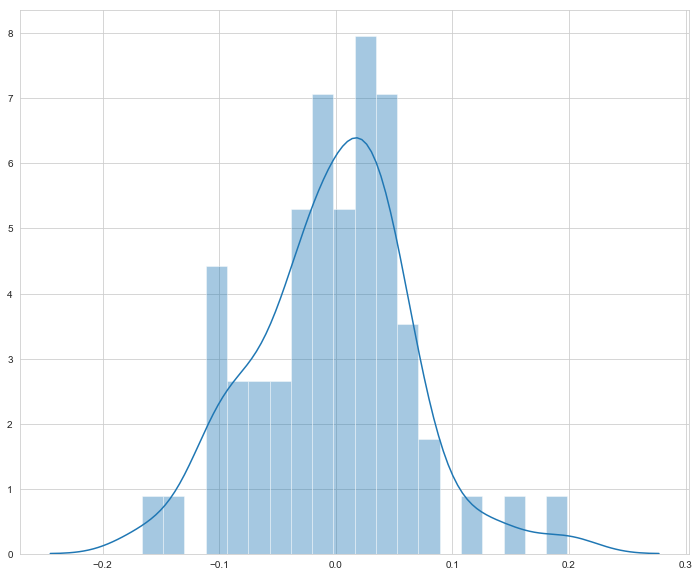

In [53]:
#Plotting the error terms
plt.figure(figsize=(12,10))
sns.distplot(y_test_rfe-y_test_predict,bins=20,)

We can see that the error term is normally distributed around zero, which means our model has done good predictions.

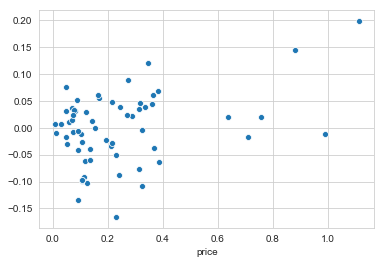

In [54]:
sns.scatterplot(y_test_rfe,y_test_rfe-y_test_predict)

Our error term are also randomly distributed on the test set which means that our model has done well on the unseen data.

### Checking the significance of our Independent variables

horsepower           0.626624
Company_porsche      0.303185
wheelbase            0.286992
cylindernumber       0.284464
Company_buick        0.261213
Company_bmw          0.219370
enginetype_rotor     0.129062
carbody_hatchback   -0.033323
enginetype_dohcv    -0.333741
dtype: float64


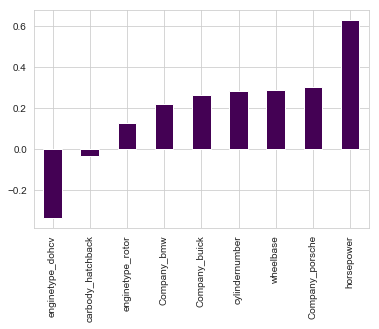

In [55]:
coefs = lr7.params[1:].sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar",cmap='viridis')
print (coefs.sort_values(ascending = False))

Horsepower affects our target variable the most while enginetype_dohcv has the most negative effect on our target variable. Below is the equation of the best fit line identified thorugh our analysis.

In [56]:
#Equation of the Best fit line
print("Equation of the Best-fit line: \n")
for index,value in lr7.params.items():
    if(index=='const'):
        print('Price = ({0}'.format(round(value,2)),end =") + ")
    elif(index=='Company_porsche'):
        print('({0} * '.format(round(value,2))+index+")")
    else:
        print('({0} * '.format(round(value,2))+index,end =") + ")

Equation of the Best-fit line: 

Price = (-0.12) + (0.29 * wheelbase) + (0.28 * cylindernumber) + (0.63 * horsepower) + (-0.03 * carbody_hatchback) + (-0.33 * enginetype_dohcv) + (0.13 * enginetype_rotor) + (0.22 * Company_bmw) + (0.26 * Company_buick) + (0.3 * Company_porsche)


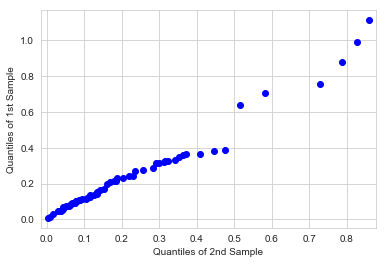

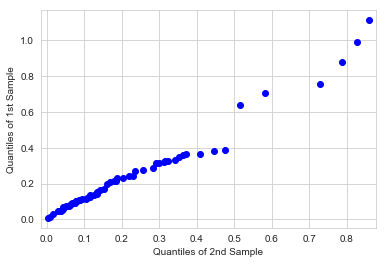

In [69]:
sm.qqplot_2samples(y_test_rfe,y_train)

In [ ]:
lr7.predict